# Exploratory Analysis

In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load files for analysis
circuits_df = pd.read_csv('../Resources/Dataset/circuits.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')
constructor_standings_df = pd.read_csv('../Resources/Dataset/constructor_standings.csv')
constructors_df = pd.read_csv('../Resources/Dataset/constructors.csv')

# Join Tables

In [3]:
# Merge constructor_standings_df  with races_df on raceId.
circuits_1_df = (constructor_standings_df.merge(races_df, how='left', on='raceId')
                 .reindex(columns=['raceId', 'circuitId', 'constructorId', 'year', 'points']))
print(circuits_1_df.shape)
circuits_1_df.head()

(12536, 5)


,raceId,circuitId,constructorId,year,points
0,18,1,1,2008,14.0
1,18,1,2,2008,8.0
2,18,1,3,2008,9.0
3,18,1,4,2008,5.0
4,18,1,5,2008,2.0


In [4]:
# Merge circuits_1_df with circuits_df on circuitId.
circuits_df = (circuits_1_df.merge(circuits_df, how='left', on='circuitId')
               .reindex(columns=['circuitId', 'raceId', 'constructorId', 'alt', 'year', 'points']))
print(circuits_df.shape)
circuits_df.head()

(12536, 6)


,circuitId,raceId,constructorId,alt,year,points
0,1,18,1,10,2008,14.0
1,1,18,2,10,2008,8.0
2,1,18,3,10,2008,9.0
3,1,18,4,10,2008,5.0
4,1,18,5,10,2008,2.0


In [5]:
# Merge circuits_df with constructors_df on constructorId.
circuits_df = (circuits_df.merge(constructors_df, how='left', on='constructorId')
               .reindex(columns=['circuitId', 'raceId', 'constructorId', 'name', 'alt', 'year', 'points']))
print(circuits_df.shape)
circuits_df.head()

(12536, 7)


,circuitId,raceId,constructorId,name,alt,year,points
0,1,18,1,McLaren,10,2008,14.0
1,1,18,2,BMW Sauber,10,2008,8.0
2,1,18,3,Williams,10,2008,9.0
3,1,18,4,Renault,10,2008,5.0
4,1,18,5,Toro Rosso,10,2008,2.0


In [6]:
# Define a function for alt
def altitudes(alt):
    if alt <100:
        return '<100'
    else:
        return '>100'

circuits_df['altitude_range'] = circuits_df.apply(lambda x: altitudes(x['alt']), axis=1)

In [7]:
# Consider data >2010 and remove zeros in points column.
circuits_df = circuits_df.loc[circuits_df['year']>2010]
circuits_df.sort_values(['constructorId'])
circuits_df.loc[(circuits_df['points']!=0)]

,circuitId,raceId,constructorId,name,alt,year,points,altitude_range
10356,2,842,4,Renault,18,2011,30.0,<100
10357,2,842,1,McLaren,18,2011,48.0,<100
10358,2,842,9,Red Bull,18,2011,72.0,<100
10363,1,841,10,Force India,10,2011,3.0,<100
10364,1,841,5,Toro Rosso,10,2011,4.0,<100
...,...,...,...,...,...,...,...,...
12528,4,1055,1,McLaren,109,2021,65.0,>100
12529,4,1055,6,Ferrari,109,2021,60.0,>100
12530,4,1055,213,AlphaTauri,109,2021,10.0,>100
12531,4,1055,117,Aston Martin,109,2021,5.0,>100


In [8]:
# Groupby circuits table for name and altitude_range.
circuits_df1 = circuits_df.groupby(['name', 'altitude_range'],as_index=False)['points'].mean()
circuits_df1.head()

,name,altitude_range,points
0,Alfa Romeo,<100,14.611111
1,Alfa Romeo,>100,14.760000
2,AlphaTauri,<100,58.125000
3,AlphaTauri,>100,31.071429
4,Alpine F1 Team,<100,1.000000


In [9]:
circuits_df2 = circuits_df1[['name','points']].loc[circuits_df1['altitude_range'] == '<100']
circuits_df3 = circuits_df1[['name','points']].loc[circuits_df1['altitude_range'] == '>100']

<Figure size 432x288 with 0 Axes>

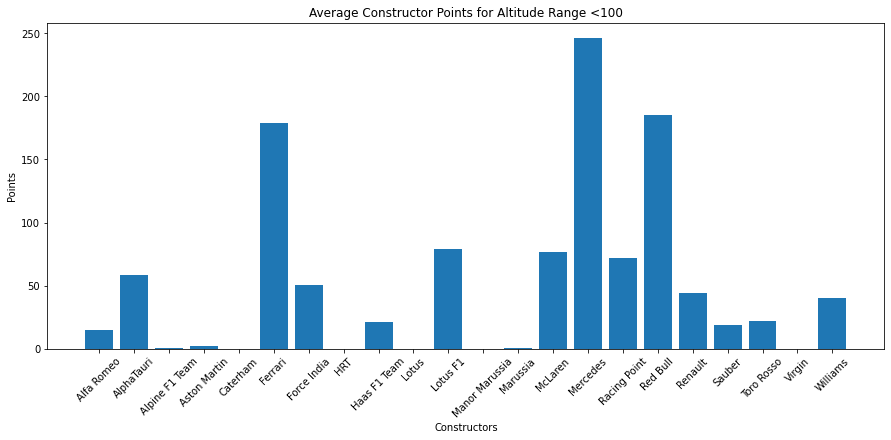

In [10]:
# Plot the Bar chart
x = circuits_df2['name']
y = circuits_df2['points']
fig = plt.figure()
plt.figure(figsize=(15, 6))
plt.bar(x, y)
plt.title('Average Constructor Points for Altitude Range <100')
plt.xlabel('Constructors')
plt.ylabel('Points')
plt.xticks(rotation=45);

<Figure size 432x288 with 0 Axes>

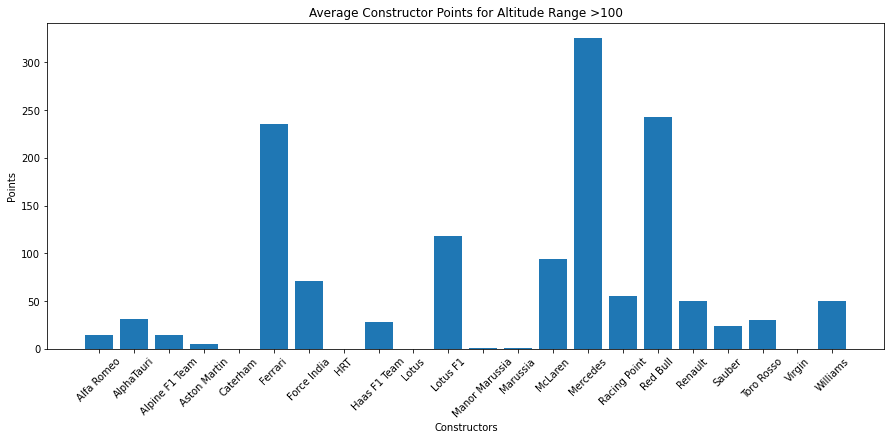

In [11]:
# Plot the Bar chart
x = circuits_df3['name']
y = circuits_df3['points']
fig = plt.figure()
plt.figure(figsize=(15, 6))
plt.bar(x, y)
plt.title('Average Constructor Points for Altitude Range >100')
plt.xlabel('Constructors')
plt.ylabel('Points')
plt.xticks(rotation=45);